In this notebook, we will compare the redshift evolution of a lightcone with that of a coeval box.

In [1]:
import postEoR.generation as gen
import numpy as np
import matplotlib.pyplot as plt
import postEoR.analysis as an

First, we generate an example box and an example cone, for use in our analysis.

In [3]:
nchunks=6

cone = gen.generate_cone(5, HII_dim=150, box_size=300, delta_z=3, max_rad=4, nchunks=nchunks)

boxes=[]

for ii in range(nchunks):
    redshift = 3.5 + ii * 3 / (nchunks-1)
    box = gen.generate_box(redshift, HII_dim=150, box_size=300, max_rad=4)
    boxes.append(box)
    print("chunk "+str(ii))

inputs in
init conds in
lcn made
lightcone ran
6.013872
Optimal overdensity cap used is 0.64
151787
crit dens 5.8160395484597314e-27
min mass of cell before halos 948736478711.7705
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
inputs in
init conds in
box ran
0.0
Optimal overdensity cap used is 0.64
51113
crit dens 5.8160395484597314e-27
min mass of cell before halos 948886454938.9878
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt

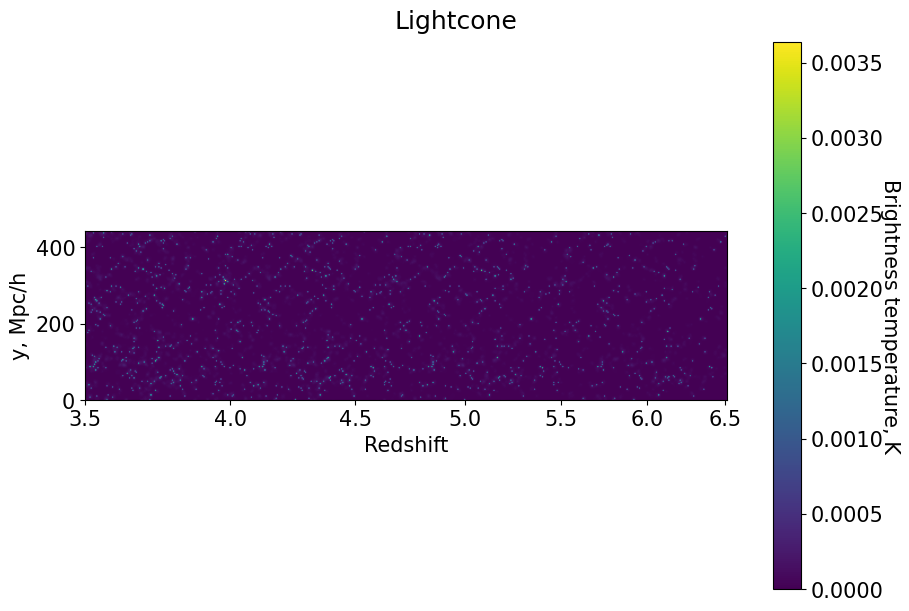

In [4]:
cone.plot_lightcone()

For comparison, we need to split the lightcone up into 'chunks' centred around each redshift bin. We follow the example used in the 21cmFAST tutorial notebooks to divide the lightcone into its constituent chunks.


First, we compare the power spectrum outputs.

Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.


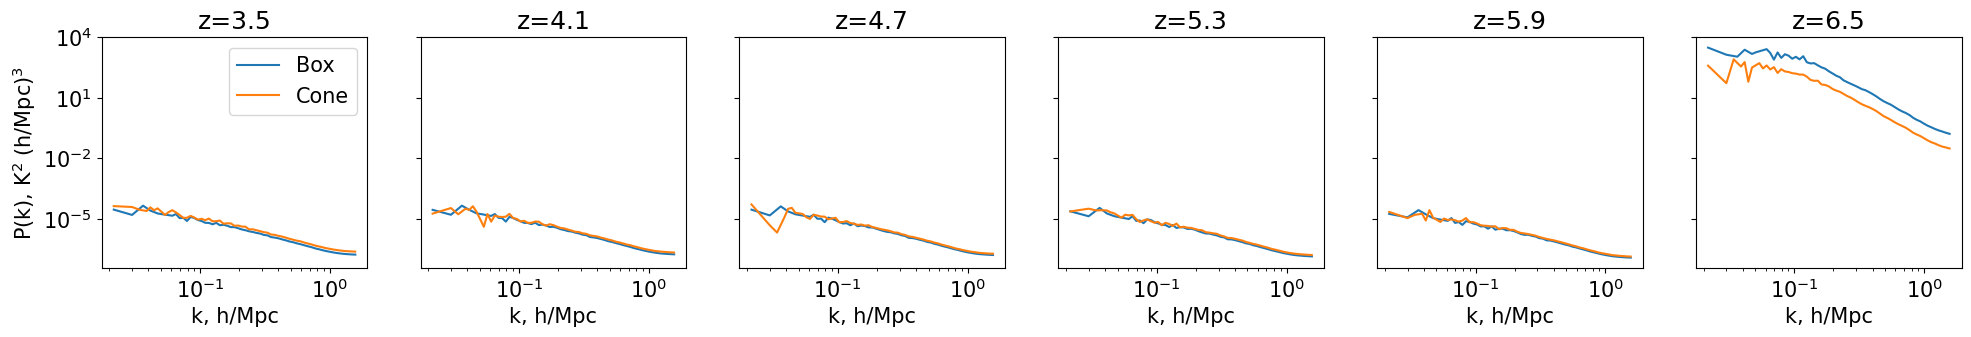

In [10]:
def powerspectra(
    cone, nchunks=6,
):  
    data=[]
    brightness_temp = cone.BT_field
    chunk_indices = list(
        range(
            0,
            np.shape(brightness_temp)[2],
            round(np.shape(brightness_temp)[2] / nchunks),
        )
    )

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(np.shape(brightness_temp)[2])

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]

        k, power, _ = an.get_PS(
            brightness_temp[:, :, start:end],
            cone.box_len, cone.HII_dim,
        )
        k = k[~np.isnan(power)]
        power = power[~np.isnan(power)]
        data.append({"k": k, "power": power})

    return data

fig, axs = plt.subplots(
    1,
    nchunks,
    sharey=True,
    figsize=(4 * (nchunks), 3),
)

PS=powerspectra(cone)

for ii in range(nchunks):
    k, power, _ = an.get_PS(boxes[ii].BT_field, boxes[ii].box_len, boxes[ii].HII_dim)

    axs[ii].plot(
        k,
        power,
        color="tab:blue",
        label="Box" 
    )
    axs[ii].plot(
        PS[ii]["k"],
        PS[ii]["power"],
        color="tab:orange",
        label="Cone"
    )

    axs[ii].set_title("z="+str(3.5 + ii * 3 / (nchunks-1)))
    axs[ii].set_yscale("log")
    axs[ii].set_xscale("log")
    axs[ii].set_xlabel("k, h/Mpc")

axs[0].legend()
axs[0].set_ylabel("P(k), K$^2$ (h/Mpc)$^3$")

plt.show()

Next, we compare the HMFs.

Text(0, 0.5, '$\\dfrac{dn}{d\\log M}$, (Mpc/h)$^{-3}$')

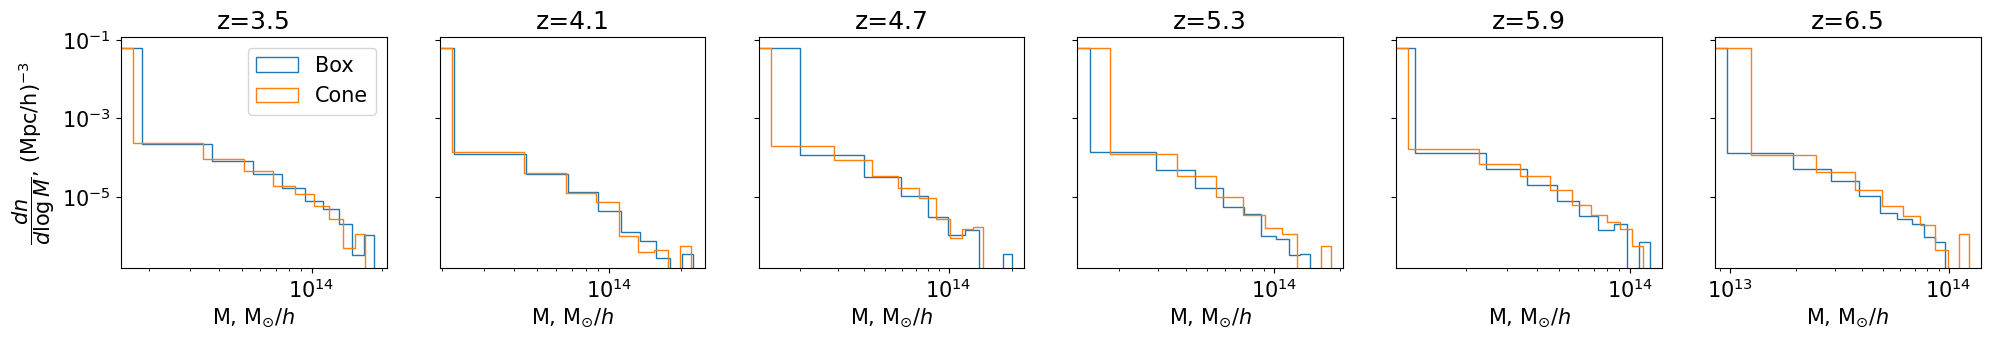

In [9]:
def get_hmf(halo_field, cell_size):
    counts, bins = np.histogram(halo_field)
    los_dist = cell_size * np.shape(halo_field)[2] # used for plotting
    bins_plot = (bins[1:] + bins[:-1]) / 2

    return bins_plot, counts, los_dist, bins

fig, axs = plt.subplots(
    1,
    nchunks,
    sharey=True,
    figsize=(4 * (nchunks), 3),
)
    

def halomassfunction(
    cone, nchunks=6,
):  
    data=[]
    halo_field=cone.halo_field
    chunk_indices = list(
        range(
            0,
            np.shape(halo_field)[2],
            round(np.shape(halo_field)[2] / nchunks),
        )
    )

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(np.shape(halo_field)[2])

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]

        bins_plot, counts, los_dist, bins = get_hmf(
            halo_field[:, :, start:end],
            cone.cell_size,
        )

        data.append({"bins_plot": bins_plot, "counts": counts, "los_dist": los_dist, "bins": bins})

    return data

HMF = halomassfunction(cone)

for ii in range(nchunks):
    bins_plot, counts, los_dist, bins = get_hmf(boxes[ii].halo_field, boxes[ii].cell_size)
    axs[ii].hist(bins_plot, bins, weights=(0.5 * counts / ((bins[1:]-bins[:-1]) * boxes[ii].box_len**2 * los_dist) * (bins[1:]+bins[:-1])), histtype='step', color="tab:blue", label="Box")
    axs[ii].hist(HMF[ii]["bins_plot"], HMF[ii]["bins"], weights=(0.5 * HMF[ii]["counts"] / ((HMF[ii]["bins"][1:]-HMF[ii]["bins"][:-1]) * cone.box_len**2 * HMF[ii]["los_dist"]) * (HMF[ii]["bins"][1:]+HMF[ii]["bins"][:-1])), histtype='step', color="tab:orange", label="Cone")

    axs[ii].set_title("z="+str(3.5 + ii * 3 / (nchunks-1)))
    axs[ii].set_yscale("log")
    axs[ii].set_xscale("log")
    axs[ii].set_xlabel('M, M$_{\odot}/h$')



axs[0].legend()
axs[0].set_ylabel('$\dfrac{dn}{d\log M}$, (Mpc/h)$^{-3}$')